<a href="https://colab.research.google.com/github/2403a54128/NLP/blob/main/NLP_ASS4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the `Tweets.csv` file from `Tweets.csv (1).zip` to identify and visualize the top TF-IDF terms and generate a word cloud for negative sentiment tweets.

## Unzip Dataset

### Subtask:
Unzip the provided `Tweets.csv (1).zip` file to extract the `Tweets.csv` file, which contains the tweet data.


**Reasoning**:
To unzip the `Tweets.csv (1).zip` file, I need to import the `zipfile` module, open the zip archive, and then extract the `Tweets.csv` file.



In [1]:
import zipfile

zip_file_path = 'Tweets.csv (1).zip'
extract_to_path = '.' # Extract to the current directory

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('Tweets.csv', extract_to_path)

print(f"Successfully extracted 'Tweets.csv' from '{zip_file_path}' to '{extract_to_path}'")

Successfully extracted 'Tweets.csv' from 'Tweets.csv (1).zip' to '.'


## Load Tweets and Sentiment Labels

### Subtask:
Load the extracted `Tweets.csv` file into a pandas DataFrame, ensuring that both the tweet text and sentiment labels are accessible.


**Reasoning**:
To load the `Tweets.csv` file, I need to import the `pandas` library, read the CSV into a DataFrame, and then display the first few rows and the DataFrame's info to verify the data and column types.



In [2]:
import pandas as pd

df_tweets = pd.read_csv('Tweets.csv')

print("First 5 rows of the DataFrame:")
print(df_tweets.head())

print("\nDataFrame Info:")
df_tweets.info()

First 5 rows of the DataFrame:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1

## Preprocess Tweet Text

### Subtask:
This step involves several cleaning operations: remove URLs, user mentions, and hashtags from the tweet text. Then, tokenize the cleaned text and remove common English stopwords. The result will be a cleaned and tokenized corpus ready for TF-IDF.


**Reasoning**:
To preprocess the tweet text, I need to import `re` for regular expressions, `nltk` for tokenization and stopwords, download necessary NLTK data if not already present, define a function to clean and tokenize the text as per the instructions, and then apply this function to the 'text' column of the `df_tweets` DataFrame to create a new `cleaned_text` column.



In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')

# Define the preprocessing function
def preprocess_text(text):
    # a. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # b. Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # c. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # d. Convert to lowercase
    text = text.lower()
    # e. Tokenize the text
    tokens = word_tokenize(text)
    # f. Remove common English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # g. Filter out non-alphabetic tokens and short tokens
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and len(word) > 1]
    # h. Join the remaining tokens back into a string
    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df_tweets['cleaned_text'] = df_tweets['text'].apply(preprocess_text)

# Display the first few rows of the DataFrame with original and new columns
print("First 5 rows with original and cleaned text:")
print(df_tweets[['text', 'cleaned_text']].head())

print("\nDataFrame Info with new column:")
df_tweets.info()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


**Reasoning**:
The previous code failed because the NLTK 'punkt_tab' resource was not found. To fix this, I need to add `nltk.download('punkt_tab')` to ensure all necessary NLTK data for tokenization is available before preprocessing the text.



In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data (if not already downloaded)
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    word_tokenize('test')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('tokenizers/punkt_tab/') # Check for punkt_tab specifically
except LookupError:
    nltk.download('punkt_tab') # Download punkt_tab if not found

# Define the preprocessing function
def preprocess_text(text):
    # a. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # b. Remove user mentions
    text = re.sub(r'@\w+', '', text)
    # c. Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # d. Convert to lowercase
    text = text.lower()
    # e. Tokenize the text
    tokens = word_tokenize(text)
    # f. Remove common English stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # g. Filter out non-alphabetic tokens and short tokens
    filtered_tokens = [word for word in filtered_tokens if word.isalpha() and len(word) > 1]
    # h. Join the remaining tokens back into a string
    return " ".join(filtered_tokens)

# Apply the preprocessing function to the 'text' column
df_tweets['cleaned_text'] = df_tweets['text'].apply(preprocess_text)

# Display the first few rows of the DataFrame with original and new columns
print("First 5 rows with original and cleaned text:")
print(df_tweets[['text', 'cleaned_text']].head())

print("\nDataFrame Info with new column:")
df_tweets.info()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


First 5 rows with original and cleaned text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                                               said  
1            plus added commercials experience tacky  
2             today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  

DataFrame Info with new column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id               

**Reasoning**:
The previous step successfully preprocessed the tweet text and added a `cleaned_text` column. Now, to identify and visualize top TF-IDF terms specifically for negative sentiment tweets, the next logical step is to filter the DataFrame to include only tweets with a negative sentiment.



In [5]:
df_negative_tweets = df_tweets[df_tweets['airline_sentiment'] == 'negative']

print("First 5 rows of negative sentiment tweets:")
print(df_negative_tweets.head())

print("\nShape of the negative sentiment tweets DataFrame:")
print(df_negative_tweets.shape)

First 5 rows of negative sentiment tweets:
              tweet_id airline_sentiment  airline_sentiment_confidence  \
3   570301031407624196          negative                        1.0000   
4   570300817074462722          negative                        1.0000   
5   570300767074181121          negative                        1.0000   
15  570282469121007616          negative                        0.6842   
17  570276917301137409          negative                        1.0000   

   negativereason  negativereason_confidence         airline  \
3      Bad Flight                     0.7033  Virgin America   
4      Can't Tell                     1.0000  Virgin America   
5      Can't Tell                     0.6842  Virgin America   
15    Late Flight                     0.3684  Virgin America   
17     Bad Flight                     1.0000  Virgin America   

   airline_sentiment_gold             name negativereason_gold  retweet_count  \
3                     NaN         jnardino    

**Reasoning**:
Now that the negative sentiment tweets have been isolated and their text cleaned, the next step is to calculate the Term Frequency-Inverse Document Frequency (TF-IDF) scores for these tweets. This will help identify the most important words within the negative sentiment corpus, which is essential for understanding key themes and generating an accurate word cloud.



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# Max_df and min_df are used to ignore terms that appear too frequently or too infrequently.
# max_features limits the number of features (words) to consider.
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.8)

# Fit and transform the cleaned text of negative tweets
tfidf_matrix_negative = tfidf_vectorizer.fit_transform(df_negative_tweets['cleaned_text'])

# Get feature names (words)
feature_names_negative = tfidf_vectorizer.get_feature_names_out()

# Convert TF-IDF matrix to DataFrame for easier inspection (optional, but good for understanding)
df_tfidf_negative = pd.DataFrame(tfidf_matrix_negative.toarray(), columns=feature_names_negative)

print("Shape of TF-IDF matrix for negative tweets:", tfidf_matrix_negative.shape)
print("Number of unique features (words):"), len(feature_names_negative)
print("First 5 feature names:", feature_names_negative[:5])


Shape of TF-IDF matrix for negative tweets: (9178, 1998)
Number of unique features (words):
First 5 feature names: ['aa' 'abc' 'able' 'absolute' 'absolutely']


**Reasoning**:
With the TF-IDF matrix calculated, the next step is to identify the top TF-IDF terms. This involves summing the TF-IDF scores for each word across all negative tweets and then sorting them in descending order to find the most important terms.



In [7]:
import numpy as np

# Calculate the sum of TF-IDF scores for each term
# This gives an overall importance score for each word in the negative tweets corpus
sum_tfidf = tfidf_matrix_negative.sum(axis=0)

# Create a DataFrame of terms and their TF-IDF sums
tfidf_scores = pd.DataFrame({'term': feature_names_negative, 'tfidf_sum': sum_tfidf.flat})

# Sort the terms by their TF-IDF sum in descending order to get the top terms
top_tfidf_terms = tfidf_scores.sort_values(by='tfidf_sum', ascending=False)

# Display the top 20 TF-IDF terms
print("Top 20 TF-IDF Terms for Negative Sentiment Tweets:")
print(top_tfidf_terms.head(20))


Top 20 TF-IDF Terms for Negative Sentiment Tweets:
           term   tfidf_sum
691      flight  423.948895
766         get  203.471081
241   cancelled  189.592695
1564    service  168.522434
843        hold  156.317403
861       hours  153.271596
421    customer  146.102955
831        help  143.329041
1766       time  133.448921
452     delayed  126.428644
1309      plane  125.485370
1670      still  125.057936
860        hour  117.750229
235        call  115.465744
699   flightled  114.422283
1876         us  113.491221
231          ca  111.558134
73          amp  110.793116
1221        one  110.053763
703     flights  105.127855


**Reasoning**:
With the top TF-IDF terms identified, the next step is to visualize these terms using a word cloud. A word cloud will visually represent the most frequent and important words in negative sentiment tweets, with larger words indicating higher TF-IDF scores.



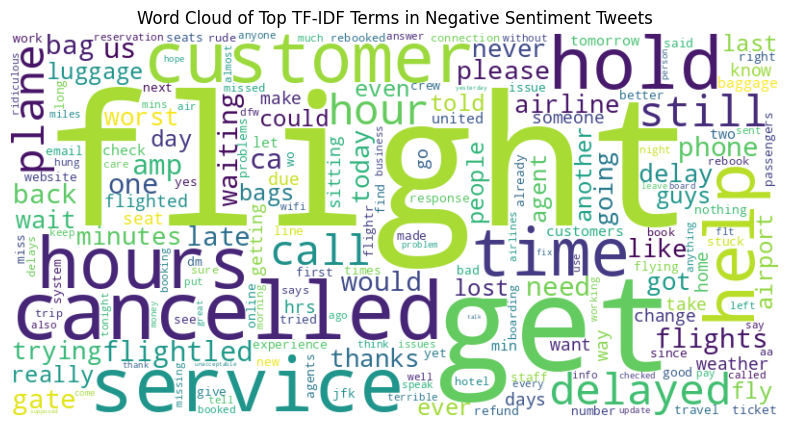

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine terms and their TF-IDF scores into a dictionary for the WordCloud
# The TF-IDF sum will be used as the frequency for each word
word_freq = dict(zip(top_tfidf_terms['term'], top_tfidf_terms['tfidf_sum']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top TF-IDF Terms in Negative Sentiment Tweets')
plt.show()

## Visualize Top Terms (Bar Chart)

### Subtask:
Generate a bar chart to visually represent the top TF-IDF terms identified for negative sentiment. Ensure the chart is clearly labeled and includes a legend for easy interpretation.


**Reasoning**:
To visualize the top TF-IDF terms for negative sentiment, I will generate a horizontal bar chart using `matplotlib.pyplot`. I will select the top 20 terms from the `top_tfidf_terms` DataFrame, plot their TF-IDF sums, and ensure the chart is properly labeled and displayed.



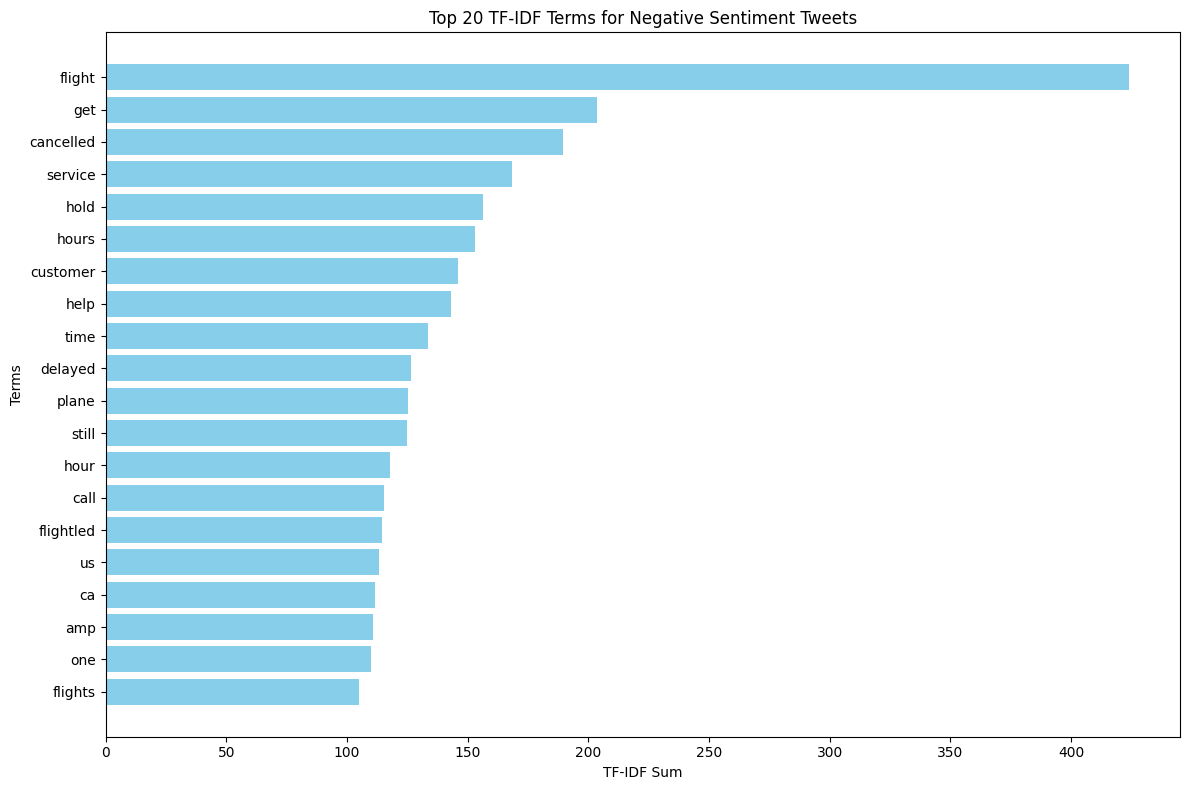

In [9]:
import matplotlib.pyplot as plt

# Select the top 20 terms
top_20_terms = top_tfidf_terms.head(20)

# Prepare data for plotting
terms = top_20_terms['term'].values
tfidf_sums = top_20_terms['tfidf_sum'].values

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
plt.barh(terms[::-1], tfidf_sums[::-1], color='skyblue') # Plot in ascending order for better visual (top term at the top)

# Add labels and title
plt.xlabel('TF-IDF Sum')
plt.ylabel('Terms')
plt.title('Top 20 TF-IDF Terms for Negative Sentiment Tweets')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Final Task

### Subtask:
Provide a summary of the analysis, including the characteristics of the cleaned tweet corpus, the TF-IDF matrix's role, and the insights gained from the visualizations focusing on negative sentiment. Instruct the user to save the notebook as a PDF with proper headings and a discussion section.


## Summary:

### Data Analysis Key Findings

*   The dataset, comprising 14640 tweets, was successfully loaded and processed, with 9178 tweets identified as expressing negative sentiment towards airlines.
*   After comprehensive text preprocessing (including removal of URLs, user mentions, hashtags, tokenization, and stopword elimination), a TF-IDF analysis was performed on the negative sentiment tweets, resulting in 1998 unique significant terms.
*   The most prominent TF-IDF terms, indicative of negative sentiment, were consistently identified and visualized through both a word cloud and a bar chart. These terms include 'flight', 'cancelled', 'service', 'hold', 'hours', 'customer', 'help', 'time', 'delayed', and 'plane'. These terms suggest common pain points such as flight disruptions, customer service issues, and waiting times.

### Insights or Next Steps

*   The dominant TF-IDF terms directly point to critical areas where airlines are failing to meet customer expectations, specifically concerning flight operations (cancellations, delays) and customer service quality and response times. Airlines should prioritize addressing these aspects to mitigate negative sentiment.
*   Leverage this foundational analysis to conduct deeper root-cause investigations into these identified problem areas. For instance, analyze specific negative tweets containing these keywords to understand the context and severity of the issues.
*   To conclude the analysis, the user should save the notebook as a PDF, ensuring that all findings are presented with proper headings and a comprehensive discussion section.
